### Якуньков Илья  
***
# Оглавление<a name="оглавление"></a>
1. [Exploratory Data Analys](#EDA)  
  1. [Проверка нулевых значений](#проверка_нулевых_значений)  
  2. [Проверка на дубликаты](#проверка_на_дубликаты)    
  3. [Проверка атрибутов](#проверка_атрибутов)  
    1. [provider, total_area & storeys](#provider&total_area&storeys)
    2. [price](#price)  
    3. [views](#views)  
    4. [storeys](#storeys)  
    5. [total_area](#total_area)  
2. [Feature engineering](#feature_engineering)
3. [Обучение модели](#обучение)
3. [Оценка моделей на тестовой выборке](#оценка)

# 1. EDA <a name="EDA"></a>

[Оглавление](#оглавление)

In [59]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import category_encoders as ce
import xgboost as xgb
import warnings 
warnings.filterwarnings("ignore")

In [60]:
import os
from zipfile import ZipFile

os.environ['KAGGLE_USERNAME'] = 'therarestalive'
os.environ['KAGGLE_KEY'] = 'a5793d7d8a07622d7a9d261a772b0ed7'

!kaggle datasets download -d mrdaniilak/russia-real-estate-20182021

Dataset URL: https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021
License(s): GNU Affero General Public License 3.0
russia-real-estate-20182021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
with ZipFile('russia-real-estate-20182021.zip', 'r') as zip_ref:
    zip_ref.extractall('russia_real_estate')

data = pd.read_csv('C:/Users/TheRarest/Downloads/ml/LAB11_YAKUNKOV/russia_real_estate/all_v2.csv')

data.head()

price        date      time    geo_lat    geo_lon  region  building_type  \
0  6050000  2018-02-19  20:00:21  59.805808  30.376141    2661              1   
1  8650000  2018-02-27  12:04:54  55.683807  37.297405      81              3   
2  4000000  2018-02-28  15:44:00  56.295250  44.061637    2871              1   
3  1850000  2018-03-01  11:24:52  44.996132  39.074783    2843              4   
4  5450000  2018-03-01  17:42:43  55.918767  37.984642      81              3   

   level  levels  rooms  area  kitchen_area  object_type  
0      8      10      3  82.6          10.8            1  
1      5      24      2  69.1          12.0            1  
2      5       9      3  66.0          10.0            1  
3     12      16      2  38.0           5.0           11  
4     13      14      2  60.0          10.0            1

In [62]:
!kaggle datasets download -d timmofeyy/realestaterent

with ZipFile('realestaterent.zip', 'r') as zip_ref:
    zip_ref.extractall('realestaterent')

data = pd.read_csv('C:/Users/TheRarest/Downloads/ml/LAB11_YAKUNKOV/realestaterent/move.csv')

Dataset URL: https://www.kaggle.com/datasets/timmofeyy/realestaterent
License(s): other
realestaterent.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

metro  price   way  views                     provider  \
0      Planernaia   45000  walk    513  realtor                       
1           VDNKh   50000  walk    389  realtor                       
2   Alekseevskaia   50000  walk    483  realtor                       
3        Sviblovo   38000  walk    414  realtor                       
4        Rimskaia   55999  walk    360  realtor                       

   fee_percent  storey  minutes  storeys  living_area  kitchen_area  \
0           50       7       10       12           19             8   
1           50      16       10       16           18             8   
2           50       5        3       12           19             5   
3           50       3       15        5           37            37   
4           99       6        7       17           21            10   

   total_area  
0          38  
1          41  
2          33  
3          37  
4          40

## 1.1. Проверка нулевых значений <a name="проверка_нулевых_значений"></a>

[Оглавление](#оглавление)

<AxesSubplot:>

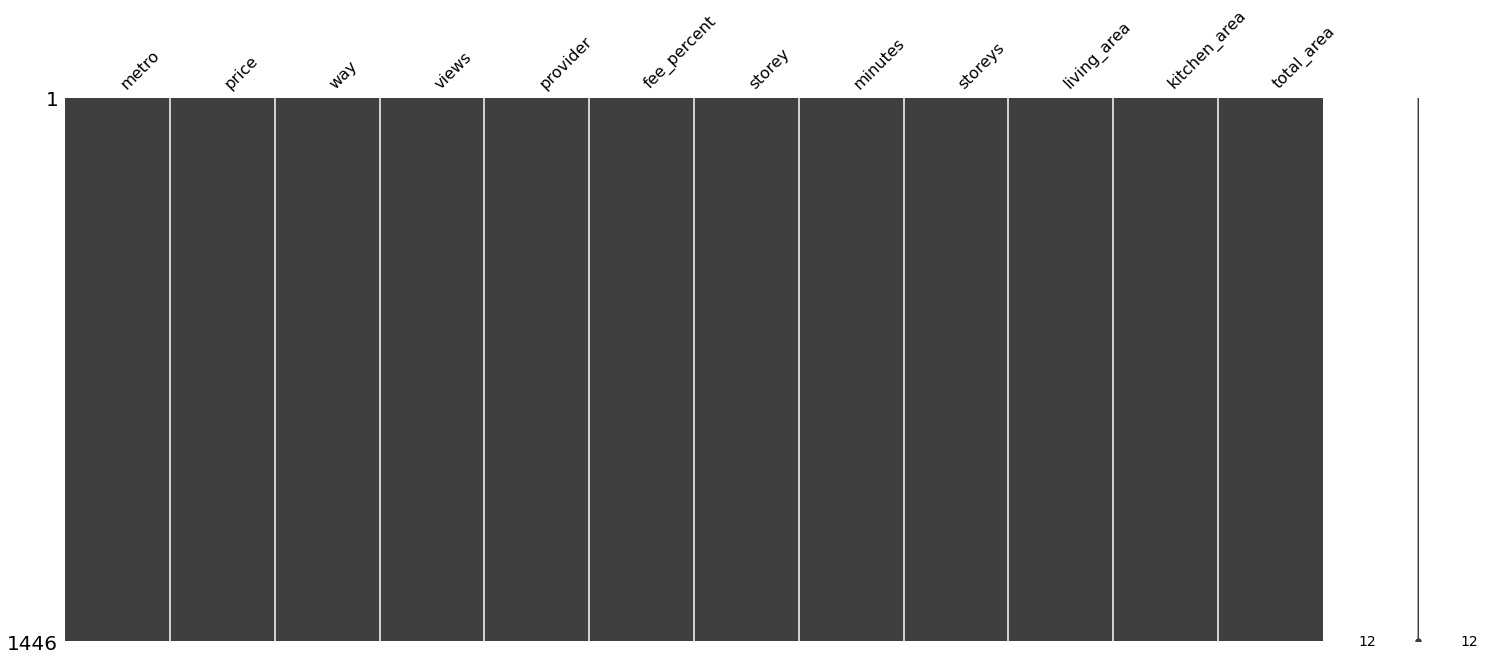

In [64]:
import missingno as msno
msno.matrix(data)

## 1.2. Проверка на дубликаты <a name="проверка_на_дубликаты"></a>

[Оглавление](#оглавление)

In [65]:
data.duplicated().sum()

1201

In [66]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [67]:
data = data.sort_values(by=['metro','price','way','views','provider',\
                            'fee_percent','storey','minutes','storeys',\
                            'living_area','kitchen_area','total_area'])
pd.set_option('display.max_rows', None)
data.head(100)

metro   price        way  views  \
208            Akademicheskaia    60000       walk     22   
2                Alekseevskaia    50000       walk    483   
105              Alekseevskaia    57000       walk     54   
78                    Altufevo    20000       walk    116   
21                    Altufevo    37000       walk     21   
234                   Altufevo    45000       walk     29   
47                      Annino    30000       walk     50   
134                     Annino    45000       walk     41   
155                     Annino    57000       walk     49   
216                 Arbatskaia   130000       walk     18   
205              Aviamotornaia    60000       walk     16   
149              Aviamotornaia    62100       walk     17   
163           Bagrationovskaia    60000       walk     15   
218           Bagrationovskaia    60000       walk     69   
189                Baumanskaia    58000       walk     19   
50                    Beliaevo    28000       walk     17   
125               Belomorskaia    45000       walk     16   
126               Belomorskaia    60000       walk     20   
138               Belorusskaia    59000       walk     15   
107               Belorusskaia    62000       walk     24   
181               Belorusskaia   135000       walk     12   
98                    Borisovo    35000       walk      9   
183          Botanicheskii sad    56500       walk     21   
244          Botanicheskii sad    60000       walk     21   
114             Bratislavskaia    60000       walk     18   
91    Bulvar Admirala Ushakova    35000       walk     28   
75        Bulvar Rokossovskogo    22000       walk     82   
215       Bulvar Rokossovskogo    45000       walk     34   
109       Bulvar Rokossovskogo    60000       walk     21   
86           Buninskaia Alleia    14000  transport     30   
83           Buninskaia Alleia    17000  transport     35   
82           Buninskaia Alleia    18000  transport     26   
85           Buninskaia Alleia    18000  transport     32   
66           Buninskaia Alleia    24000  transport     25   
30           Buninskaia Alleia    25000  transport    173   
242          Buninskaia Alleia    29000  transport     25   
144          Buninskaia Alleia    29200  transport     20   
37           Buninskaia Alleia    30000  transport    103   
156          Buninskaia Alleia    31200  transport     27   
124          Buninskaia Alleia    43000  transport     28   
204          Buninskaia Alleia    58000       walk     15   
168          Buninskaia Alleia    58000       walk     24   
213                 Butyrskaia    60000       walk     65   
34              Cherkizovskaia    42000       walk     69   
121             Cherkizovskaia    45000       walk     11   
224             Chertanovskaia    45000       walk     21   
192                     Dinamo    60000       walk     20   
186               Dmitrovskaia    57000       walk     22   
19               Dobryninskaia    22000       walk     56   
233              Dobryninskaia    45000       walk     21   
73                    Dubrovka    22000       walk     84   
100          Elektrozavodskaia    61000       walk     51   
44                 Filatov Lug    15000       walk     22   
32                        Fili    50000       walk     61   
41                        Fili    70000       walk     28   
169                       Fili   135000       walk     11   
207                   Govorovo    57000       walk     13   
150                   Govorovo    57000       walk     26   
129                   Govorovo    60000       walk     18   
132                   Iasenevo    44000       walk     19   
221             Iugo-Zapadnaia    60000  transport     35   
65               Izmailovskaia    25000  transport     22   
228                Kaluzhskaia    60000       walk     31   
95             Kantemirovskaia    55000       walk     20   
93                    Khovrino    33000       walk     28   


## 1.3. Проверка атрибутов <a name="проверка_атрибутов"></a>

[Оглавление](#оглавление)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 208 to 161
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         245 non-null    object
 1   price         245 non-null    int64 
 2   way           245 non-null    object
 3   views         245 non-null    int64 
 4   provider      245 non-null    object
 5   fee_percent   245 non-null    int64 
 6   storey        245 non-null    int64 
 7   minutes       245 non-null    int64 
 8   storeys       245 non-null    int64 
 9   living_area   245 non-null    int64 
 10  kitchen_area  245 non-null    int64 
 11  total_area    245 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 24.9+ KB


### 1.3.1. provider, total_area & storeys  <a name="provider&total_area&storeys"></a>

[Оглавление](#оглавление)

In [69]:
data['provider'].unique()

array(['Застройщик                 ', 'realtor                \xa0 \xa0 ',
       'owner                 ', 'realtor                 ',
       'agency                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'agency                \xa0 \xa0 '], dtype=object)

In [70]:
data['provider'] = data['provider'].apply(lambda x: x.lstrip().rstrip() if isinstance(x, str) else x)
data['provider'] = data['provider'].replace('Застройщик', 'developer')
data['provider'] = data['provider'].str.replace('\xa0', '')
data['provider'].unique()

array(['developer', 'realtor', 'owner', 'agency'], dtype=object)

In [71]:
data = data[(data['living_area'] + data['kitchen_area']) <= data['total_area']]
data = data[data['storey'] <= data['storeys']]
data.head(100)

metro   price        way  views   provider  \
208              Akademicheskaia    60000       walk     22  developer   
2                  Alekseevskaia    50000       walk    483    realtor   
78                      Altufevo    20000       walk    116      owner   
21                      Altufevo    37000       walk     21    realtor   
47                        Annino    30000       walk     50     agency   
134                       Annino    45000       walk     41  developer   
205                Aviamotornaia    60000       walk     16  developer   
163             Bagrationovskaia    60000       walk     15     agency   
218             Bagrationovskaia    60000       walk     69  developer   
50                      Beliaevo    28000       walk     17     agency   
125                 Belomorskaia    45000       walk     16  developer   
126                 Belomorskaia    60000       walk     20  developer   
107                 Belorusskaia    62000       walk     24  developer   
98                      Borisovo    35000       walk      9     agency   
114               Bratislavskaia    60000       walk     18  developer   
91      Bulvar Admirala Ushakova    35000       walk     28     agency   
75          Bulvar Rokossovskogo    22000       walk     82      owner   
215         Bulvar Rokossovskogo    45000       walk     34  developer   
109         Bulvar Rokossovskogo    60000       walk     21  developer   
86             Buninskaia Alleia    14000  transport     30     agency   
83             Buninskaia Alleia    17000  transport     35      owner   
82             Buninskaia Alleia    18000  transport     26      owner   
85             Buninskaia Alleia    18000  transport     32     agency   
66             Buninskaia Alleia    24000  transport     25     agency   
30             Buninskaia Alleia    25000  transport    173      owner   
37             Buninskaia Alleia    30000  transport    103    realtor   
156            Buninskaia Alleia    31200  transport     27     agency   
124            Buninskaia Alleia    43000  transport     28  developer   
213                   Butyrskaia    60000       walk     65  developer   
34                Cherkizovskaia    42000       walk     69    realtor   
224               Chertanovskaia    45000       walk     21  developer   
19                 Dobryninskaia    22000       walk     56    realtor   
233                Dobryninskaia    45000       walk     21     agency   
73                      Dubrovka    22000       walk     84      owner   
100            Elektrozavodskaia    61000       walk     51  developer   
44                   Filatov Lug    15000       walk     22     agency   
32                          Fili    50000       walk     61      owner   
41                          Fili    70000       walk     28     agency   
169                         Fili   135000       walk     11     agency   
207                     Govorovo    57000       walk     13  developer   
129                     Govorovo    60000       walk     18  developer   
221               Iugo-Zapadnaia    60000  transport     35  developer   
65                 Izmailovskaia    25000  transport     22     agency   
13                      Khovrino    38000       walk    224    realtor   
42                    Kommunarka    19000       walk     34     agency   
60                    Kommunarka    24000       walk     22     agency   
117                    Kotelniki    44000       walk     10  developer   
140               Krasnoselskaia    60000       walk     25  developer   
17                  Kuntcevskaia    45000       walk     40      owner   
92                  Kuntcevskaia    50000       walk     10     agency   
97                      Kurskaia    75000       walk     16     agency   
52                      Kuzminki    27000       walk     16     agency   
51                      Liublino    26000       walk     17     agency   
243                     Liublino

### 1.3.2. price <a name="price"></a>

[Оглавление](#оглавление)

In [72]:
data_price = data.copy()

Text(0.5, 1.0, 'price')

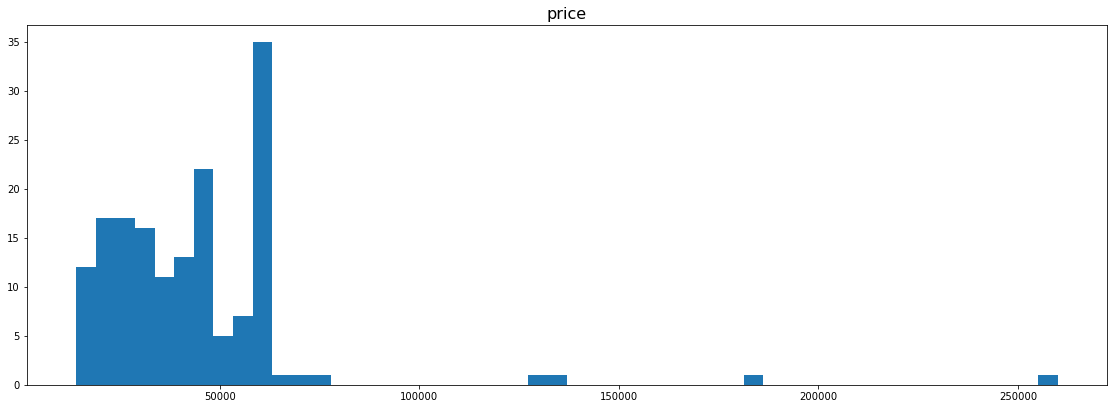

In [73]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data_price['price'], bins = 50)
axes.set_title('price', fontsize = 16)

<AxesSubplot:xlabel='price'>

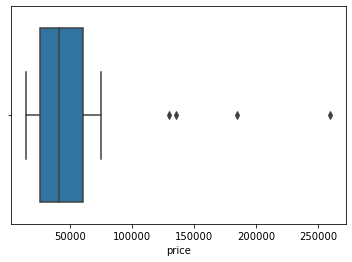

In [74]:
sns.boxplot(data_price['price'])

25-й перцентиль: 25125.0, 75-й перцентиль: 59999.75, IQR: 34874.75,  Границы выбросов: [-27187.125, 112311.875].


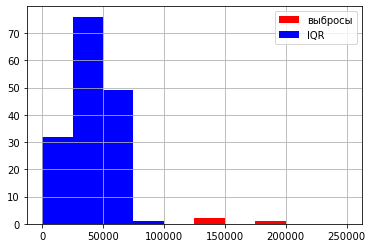

In [75]:
median = data_price['price'].median()
IQR = data_price['price'].quantile(0.75) - data['price'].quantile(0.25)
perc25 = data_price['price'].quantile(0.25)
perc75 = data_price['price'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


data_price['price'].hist(bins = 10, 
                                  range = (-1, 250000), 
                                  color = 'red',
                                  label = 'выбросы')

data_price['price'].loc[data_price['price'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, 
                                                                             range = (-1, 250000),
                                                                             color = 'blue',
                                                                             label = 'IQR')

plt.legend()

In [76]:
data_price = data_price[(data_price['price'] < perc75 + 1.5*IQR)&(perc25 - 1.5*IQR < data_price['price'])]
data_price.shape

(158, 12)

In [77]:
data = data_price

Text(0.5, 1.0, 'price')

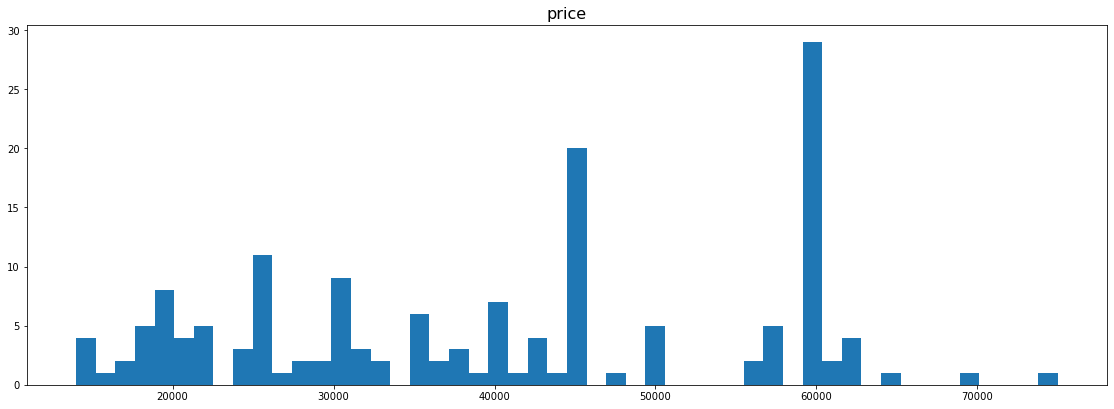

In [78]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['price'], bins = 50)
axes.set_title('price', fontsize = 16)

### 1.3.3. views <a name="views"></a>

[Оглавление](#оглавление)

In [79]:
data_views = data.copy()

Text(0.5, 1.0, 'views')

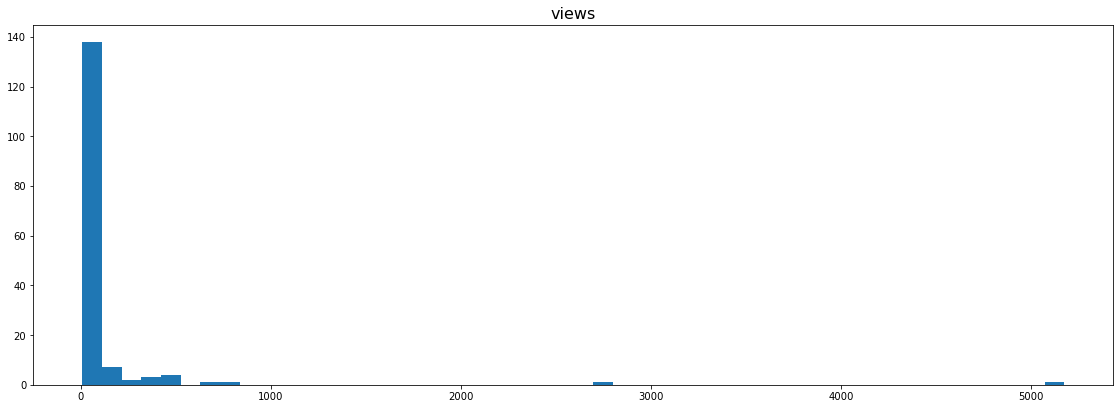

In [80]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data_views['views'], bins = 50)
axes.set_title('views', fontsize = 16)

<AxesSubplot:xlabel='views'>

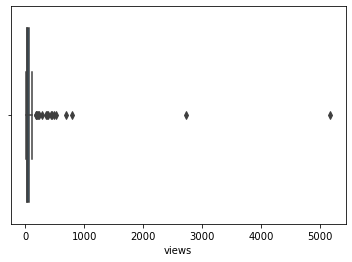

In [81]:
sns.boxplot(data_views['views'])

In [82]:
median = data_views['views'].median()
IQR = data_views['views'].quantile(0.75) - data['views'].quantile(0.25)
perc25 = data_views['views'].quantile(0.25)
perc75 = data_views['views'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 20.0, 75-й перцентиль: 63.25, IQR: 43.25,  Границы выбросов: [-44.875, 128.125].


In [83]:
data_views = data_views[(data_views['views'] < perc75 + 1.5*IQR)&(perc25 - 1.5*IQR < data_views['views'])]
data_views.shape

(141, 12)

In [84]:
data = data_views

Text(0.5, 1.0, 'views')

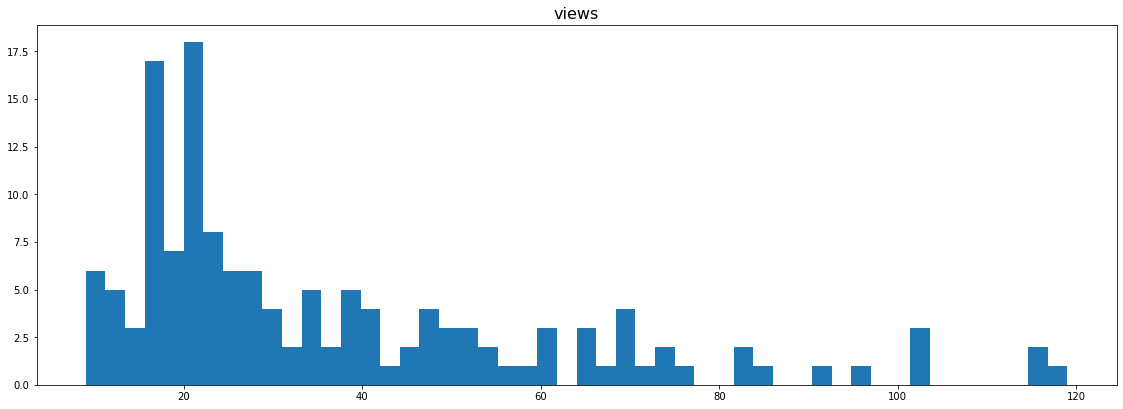

In [85]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['views'], bins = 50)
axes.set_title('views', fontsize = 16)

### 1.3.4. storeys <a name="storeys"></a>

[Оглавление](#оглавление)

In [86]:
data_storeys = data.copy()

Text(0.5, 1.0, 'storeys')

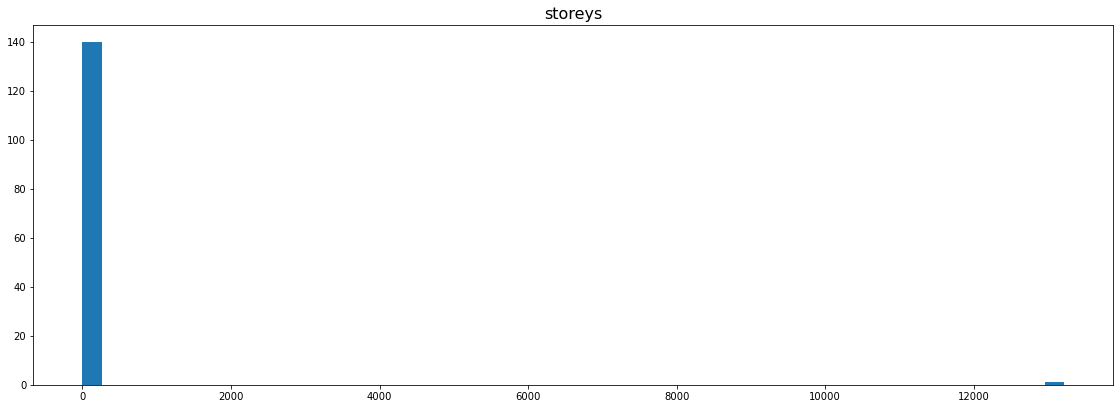

In [87]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data_storeys['storeys'], bins = 50)
axes.set_title('storeys', fontsize = 16)

In [88]:
sns.boxplot(data_storeys['storeys'])

<AxesSubplot:xlabel='storeys'>

In [89]:
median = data_storeys['storeys'].median()
IQR = data_storeys['storeys'].quantile(0.75) - data_storeys['storeys'].quantile(0.25)
perc25 = data_storeys['storeys'].quantile(0.25)
perc75 = data_storeys['storeys'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 9.0, 75-й перцентиль: 17.0, IQR: 8.0,  Границы выбросов: [-3.0, 29.0].


In [90]:
data_storeys = data_storeys[(perc25 - 1.5*IQR < data_storeys['storeys'])&(data_storeys['storeys'] < perc75 + 1.5*IQR)]
data_storeys.shape

(136, 12)

In [91]:
data = data_storeys

Text(0.5, 1.0, 'storeys')

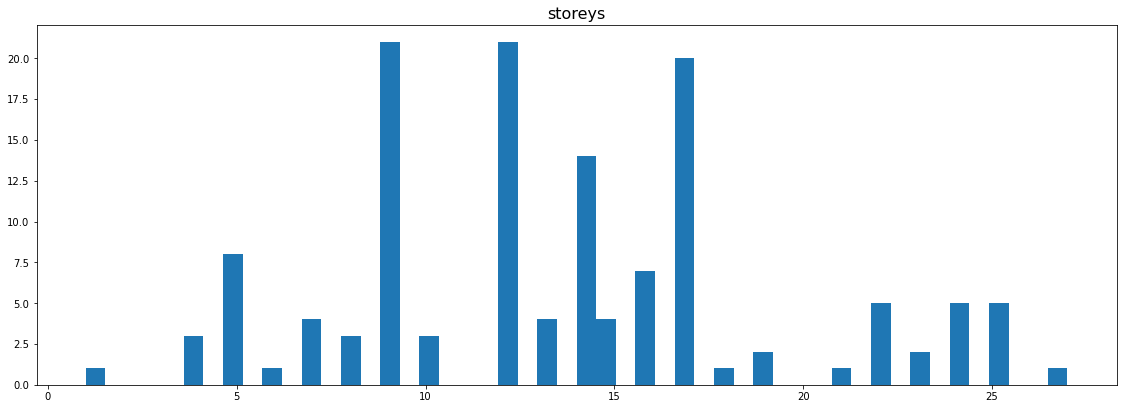

In [92]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['storeys'], bins = 50)
axes.set_title('storeys', fontsize = 16)

### 1.3.5. total_area <a name="total_area"></a>

[Оглавление](#оглавление)

In [93]:
data_total_area = data.copy()

Text(0.5, 1.0, 'total_area')

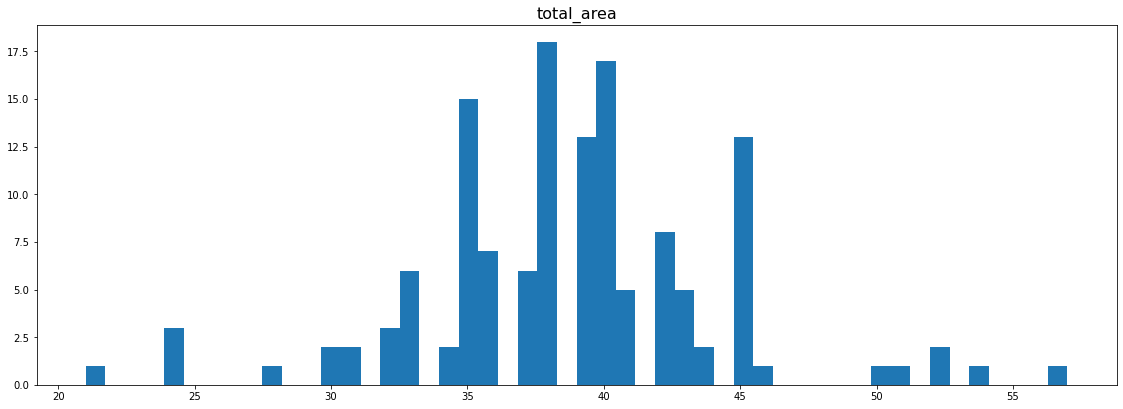

In [94]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data_total_area['total_area'], bins = 50)
axes.set_title('total_area', fontsize = 16)

<AxesSubplot:xlabel='total_area'>

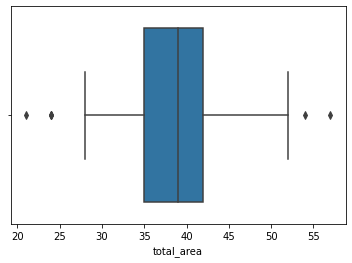

In [95]:
sns.boxplot(data_total_area['total_area'])

In [96]:
median = data_total_area['total_area'].median()
IQR = data_total_area['total_area'].quantile(0.75) - data_storeys['total_area'].quantile(0.25)
perc25 = data_total_area['total_area'].quantile(0.25)
perc75 = data_total_area['total_area'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 35.0, 75-й перцентиль: 42.0, IQR: 7.0,  Границы выбросов: [24.5, 52.5].


In [97]:
data_total_area = data_total_area[(perc25 - 1.5*IQR < data_total_area['total_area'])\
                                  &\
                                  (data_total_area['total_area'] < perc75 + 1.5*IQR)]
data_total_area.shape

(130, 12)

In [98]:
data = data_total_area

Text(0.5, 1.0, 'total_area')

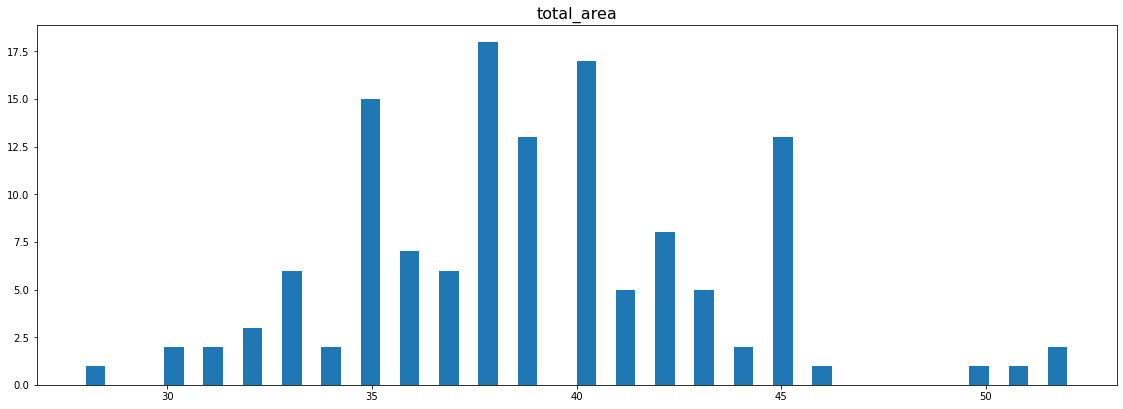

In [99]:
fig = plt.figure(figsize = [15,5])
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(data['total_area'], bins = 50)
axes.set_title('total_area', fontsize = 16)

# 2. Feature engineering <a name="feature_engineering"></a>

[Оглавление](#оглавление)

In [100]:
# Копируем датафрейм
fulfilled_data = data.copy()

### Добавление новых параметров

In [101]:
# 1. Цена за квадратный метр
fulfilled_data['price_per_sqm'] = fulfilled_data['price'] / fulfilled_data['total_area']

# 2. Общая комиссия
fulfilled_data['total_fee'] = fulfilled_data['price'] * (fulfilled_data['fee_percent'] / 100)

# 3. Средняя цена за квадратный метр в жилой зоне
fulfilled_data['living_area_price_per_sqm'] = fulfilled_data['price'] / fulfilled_data['living_area']

# 4. Средняя цена за квадратный метр на кухне
fulfilled_data['kitchen_area_price_per_sqm'] = fulfilled_data['price'] / fulfilled_data['kitchen_area']

# 5. Стоимость до метро за минуту
fulfilled_data['cost_per_minute_to_metro'] = fulfilled_data['price'] / fulfilled_data['minutes']

# 6. Отношение площади кухни к общей площади
fulfilled_data['kitchen_to_total_area_ratio'] = fulfilled_data['kitchen_area'] / fulfilled_data['total_area']

# 7. Отношение жилой площади к общей площади
fulfilled_data['living_to_total_area_ratio'] = fulfilled_data['living_area'] / fulfilled_data['total_area']

# 8. Площадь других помещений
fulfilled_data['other_area'] = fulfilled_data['total_area'] - fulfilled_data['living_area'] - fulfilled_data['kitchen_area']

# 9. Процент площади кухни
fulfilled_data['kitchen_area_percent'] = (fulfilled_data['kitchen_area'] / fulfilled_data['total_area']) * 100

# 10. Процент жилой площади
fulfilled_data['living_area_percent'] = (fulfilled_data['living_area'] / fulfilled_data['total_area']) * 100

# 11. Процент площади других помещений
fulfilled_data['other_area_percent'] = (fulfilled_data['other_area'] / fulfilled_data['total_area']) * 100


fulfilled_data

metro  price        way  views   provider  \
208               Akademicheskaia   60000       walk     22  developer   
78                       Altufevo   20000       walk    116      owner   
21                       Altufevo   37000       walk     21    realtor   
47                         Annino   30000       walk     50     agency   
134                        Annino   45000       walk     41  developer   
205                 Aviamotornaia   60000       walk     16  developer   
218              Bagrationovskaia   60000       walk     69  developer   
50                       Beliaevo   28000       walk     17     agency   
125                  Belomorskaia   45000       walk     16  developer   
126                  Belomorskaia   60000       walk     20  developer   
107                  Belorusskaia   62000       walk     24  developer   
98                       Borisovo   35000       walk      9     agency   
114                Bratislavskaia   60000       walk     18  developer   
91       Bulvar Admirala Ushakova   35000       walk     28     agency   
75           Bulvar Rokossovskogo   22000       walk     82      owner   
215          Bulvar Rokossovskogo   45000       walk     34  developer   
109          Bulvar Rokossovskogo   60000       walk     21  developer   
86              Buninskaia Alleia   14000  transport     30     agency   
83              Buninskaia Alleia   17000  transport     35      owner   
82              Buninskaia Alleia   18000  transport     26      owner   
85              Buninskaia Alleia   18000  transport     32     agency   
66              Buninskaia Alleia   24000  transport     25     agency   
124             Buninskaia Alleia   43000  transport     28  developer   
213                    Butyrskaia   60000       walk     65  developer   
224                Chertanovskaia   45000       walk     21  developer   
19                  Dobryninskaia   22000       walk     56    realtor   
233                 Dobryninskaia   45000       walk     21     agency   
73                       Dubrovka   22000       walk     84      owner   
100             Elektrozavodskaia   61000       walk     51  developer   
44                    Filatov Lug   15000       walk     22     agency   
32                           Fili   50000       walk     61      owner   
41                           Fili   70000       walk     28     agency   
129                      Govorovo   60000       walk     18  developer   
221                Iugo-Zapadnaia   60000  transport     35  developer   
65                  Izmailovskaia   25000  transport     22     agency   
42                     Kommunarka   19000       walk     34     agency   
60                     Kommunarka   24000       walk     22     agency   
117                     Kotelniki   44000       walk     10  developer   
140                Krasnoselskaia   60000       walk     25  developer   
17                   Kuntcevskaia   45000       walk     40      owner   
92                   Kuntcevskaia   50000       walk     10     agency   
97                       Kurskaia   75000       walk     16     agency   
52                       Kuzminki   27000       walk     16     agency   
51                       Liublino   26000       walk     17     agency   
243                      Liublino   43000       walk     23     agency   
35                 Lukhmanovskaia   40000       walk     55      owner   
54                         Marino   25000       walk     25     agency   
77                     Medvedkovo   21000       walk     77      owner   
211                      Minskaia   43000  transport     11  developer   
174                        Mitino   30000  transport     68     agency   
88                         Mitino   37000       walk     16      owner   
72                      Nagornaia   22000       walk    115      owner   
127         Nakhimovskii prospekt   45000       walk     23  developer   
84            Narodnoe Opolchenie

In [102]:
# Применяем get_dummies к нечисловым параметрам
dummies = pd.get_dummies(data[['metro', 'way', 'provider']])

# Объединяем преобразованные атрибуты с исходным датафреймом
fulfilled_data = pd.concat([fulfilled_data, dummies], axis=1) 

# Удаляем старые атрибуты
fulfilled_data = fulfilled_data.drop(columns=['metro', 'way', 'provider'])

# Для красоты сортируем и обновляем индексы
fulfilled_data = fulfilled_data.sort_index().reset_index(drop=True)

In [103]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
msno.bar(fulfilled_data)

<AxesSubplot:>

In [104]:
fulfilled_data

price  views  fee_percent  storey  minutes  storeys  living_area  \
0    40000     69           40      10        5       17           18   
1    45000     40            0       6       15        9           19   
2    20000     73           50       5       10        8           20   
3    22000     56           50      10        5       14           22   
4    20000     38           50       7        6       10           22   
5    37000     21           30       7       10       12           21   
6    45000     30            0       5        5       15           25   
7    47000     25           50       4       12       14           21   
8    28000     66           50       4       14        9           10   
9    25000    102            0       5        5       12           20   
10   40000     60           30       3       17        9           20   
11   45000     45           31      22       15       22           23   
12   50000     61            0       6        5        7           18   
13   40000     55            0       1       15        1           17   
14   45000     61           50      10       15       17           20   
15   35000     16          100      13        0       14           19   
16   70000     28           50      14        0       27           16   
17   19000     34          100       3        0        9           18   
18   33000     22          100       1        0       12           19   
19   15000     22          100       7        0        7           20   
20   32000     12          100       3        0       14           20   
21   38000     17          100       4        0       12           19   
22   30000     50          100       9        0       14           22   
23   30000     20           60       6        0       12           19   
24   20000     10           50       4        4        9           20   
25   28000     17           43      14        9       16           31   
26   26000     17           50      14        2       16           28   
27   27000     16           48      15        6       24           29   
28   25500     16           47      15        7       17           30   
29   25000     25           50       8       13       17           21   
30   20000     26           50       5        6       13           19   
31   40000     10            0      12        5       12           20   
32   40000     22            0      17        0       17           20   
33   35000     29            0      12        0       12           18   
34   50000     28            0      15        0       17           20   
35   24000     22           50       5       15       15           14   
36   14000     24           50       6        6       17           18   
37   14000     31           50       4        5       17           19   
38   18000     22           50       8        5       17           17   
39   33000     22            0       5        5       16           20   
40   25000     22           50       2       19        5           24   
41   24000     25           50      16        7       17           26   
42   25000     47           50      17       10       22           20   
43   24000     38           50       7        6        9           24   
44   22000     96            0       9        6       17           30   
45   21000     83            0       7        6       12           30   
46   21000     51            0       5       32        9           30   
47   22000    115            0       5        6        9           30   
48   22000     84            0      10       11       16           30   
49   21000     72            0       7        9        9           30   
50   22000     82            0       3        6        5           30   
51   20000     92            0       4        4        9           30   
52   21000     77            0       7        5       14           30   
53   20000    116            0       7        5       12       

In [105]:
# Преобразование в float32
fulfilled_data = fulfilled_data.apply(lambda x: x.astype('float32'))
fulfilled_data

price  views  fee_percent  storey  minutes  storeys  living_area  \
0    40000.0   69.0         40.0    10.0      5.0     17.0         18.0   
1    45000.0   40.0          0.0     6.0     15.0      9.0         19.0   
2    20000.0   73.0         50.0     5.0     10.0      8.0         20.0   
3    22000.0   56.0         50.0    10.0      5.0     14.0         22.0   
4    20000.0   38.0         50.0     7.0      6.0     10.0         22.0   
5    37000.0   21.0         30.0     7.0     10.0     12.0         21.0   
6    45000.0   30.0          0.0     5.0      5.0     15.0         25.0   
7    47000.0   25.0         50.0     4.0     12.0     14.0         21.0   
8    28000.0   66.0         50.0     4.0     14.0      9.0         10.0   
9    25000.0  102.0          0.0     5.0      5.0     12.0         20.0   
10   40000.0   60.0         30.0     3.0     17.0      9.0         20.0   
11   45000.0   45.0         31.0    22.0     15.0     22.0         23.0   
12   50000.0   61.0          0.0     6.0      5.0      7.0         18.0   
13   40000.0   55.0          0.0     1.0     15.0      1.0         17.0   
14   45000.0   61.0         50.0    10.0     15.0     17.0         20.0   
15   35000.0   16.0        100.0    13.0      0.0     14.0         19.0   
16   70000.0   28.0         50.0    14.0      0.0     27.0         16.0   
17   19000.0   34.0        100.0     3.0      0.0      9.0         18.0   
18   33000.0   22.0        100.0     1.0      0.0     12.0         19.0   
19   15000.0   22.0        100.0     7.0      0.0      7.0         20.0   
20   32000.0   12.0        100.0     3.0      0.0     14.0         20.0   
21   38000.0   17.0        100.0     4.0      0.0     12.0         19.0   
22   30000.0   50.0        100.0     9.0      0.0     14.0         22.0   
23   30000.0   20.0         60.0     6.0      0.0     12.0         19.0   
24   20000.0   10.0         50.0     4.0      4.0      9.0         20.0   
25   28000.0   17.0         43.0    14.0      9.0     16.0         31.0   
26   26000.0   17.0         50.0    14.0      2.0     16.0         28.0   
27   27000.0   16.0         48.0    15.0      6.0     24.0         29.0   
28   25500.0   16.0         47.0    15.0      7.0     17.0         30.0   
29   25000.0   25.0         50.0     8.0     13.0     17.0         21.0   
30   20000.0   26.0         50.0     5.0      6.0     13.0         19.0   
31   40000.0   10.0          0.0    12.0      5.0     12.0         20.0   
32   40000.0   22.0          0.0    17.0      0.0     17.0         20.0   
33   35000.0   29.0          0.0    12.0      0.0     12.0         18.0   
34   50000.0   28.0          0.0    15.0      0.0     17.0         20.0   
35   24000.0   22.0         50.0     5.0     15.0     15.0         14.0   
36   14000.0   24.0         50.0     6.0      6.0     17.0         18.0   
37   14000.0   31.0         50.0     4.0      5.0     17.0         19.0   
38   18000.0   22.0         50.0     8.0      5.0     17.0         17.0   
39   33000.0   22.0          0.0     5.0      5.0     16.0         20.0   
40   25000.0   22.0         50.0     2.0     19.0      5.0         24.0   
41   24000.0   25.0         50.0    16.0      7.0     17.0         26.0   
42   25000.0   47.0         50.0    17.0     10.0     22.0         20.0   
43   24000.0   38.0         50.0     7.0      6.0      9.0         24.0   
44   22000.0   96.0          0.0     9.0      6.0     17.0         30.0   
45   21000.0   83.0          0.0     7.0      6.0     12.0         30.0   
46   21000.0   51.0          0.0     5.0     32.0      9.0         30.0   
47   22000.0  115.0          0.0     5.0      6.0      9.0         30.0   
48   22000.0   84.0          0.0    10.0     11.0     16.0         30.0   
49   21000.0   72.0          0.0     7.0      9.0      9.0         30.0   
50   22000.0   82.0          0.0     3.0      6.0      5.0         30.0   
51   20000.0   92.0          0.0     4.0      4.0      9.0         30.0   
52   21000.0   77.0          0.0

In [106]:
data = fulfilled_data
pd.set_option('display.max_columns', 130)
info_str = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 104 entries, price to provider_realtor
dtypes: float32(104)
memory usage: 52.9 KB


# 3. Обучение моделей <a name="обучение"></a>

[Оглавление](#оглавление)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Заполнение NaN значений
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

# Определение признаков и целевой переменной
X = data.drop(columns=['price'])
y = data['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Обучение модели XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Обучение модели ExtraTreesRegressor
et_model = ExtraTreesRegressor(random_state=42)
et_model.fit(X_train, y_train)




ExtraTreesRegressor(random_state=42)

# 4. Оценка моделей на тестовой выборке<a name="оценка"></a>

[Оглавление](#оглавление)

In [108]:
from sklearn.metrics import mean_squared_log_error, r2_score, mean_absolute_error

# Функция для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# RandomForestRegressor
rf_predictions = rf_model.predict(X_test)
rf_rmsle = rmsle(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# XGBRegressor
xgb_predictions = xgb_model.predict(X_test)
xgb_rmsle = rmsle(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

# ExtraTreesRegressor
et_predictions = et_model.predict(X_test)
et_rmsle = rmsle(y_test, et_predictions)
et_r2 = r2_score(y_test, et_predictions)
et_mae = mean_absolute_error(y_test, et_predictions)

# Вывод результатов
print("RandomForestRegressor:")
print("  RMSLE:", rf_rmsle)
print("  R²:", rf_r2)
print("  MAE:", rf_mae)

print("\nXGBRegressor:")
print("  RMSLE:", xgb_rmsle)
print("  R²:", xgb_r2)
print("  MAE:", xgb_mae)

print("\nExtraTreesRegressor:")
print("  RMSLE:", et_rmsle)
print("  R²:", et_r2)
print("  MAE:", et_mae)

RandomForestRegressor:
  RMSLE: 0.06156671190350887
  R²: 0.9803925808202175
  MAE: 1451.1904761904761

XGBRegressor:
  RMSLE: 0.06152719
  R²: 0.9756220237446507
  MAE: 1477.6826

ExtraTreesRegressor:
  RMSLE: 0.037599520793169944
  R²: 0.9906066759140976
  MAE: 960.952380952381


Видим, что ExtraTreesRegressor имеет:
- имеет наименьшее значение RMSLE, что означает, что предсказания модели ближе к фактическим значениям в логарифмическом масштабе;
- имеет наивысшее значение R², что указывает на то, что эта модель лучше объясняет дисперсию целевой переменной;
- имеет наименьшее значение MAE, что показывает, что модель имеет наименьшую среднюю абсолютную ошибку.

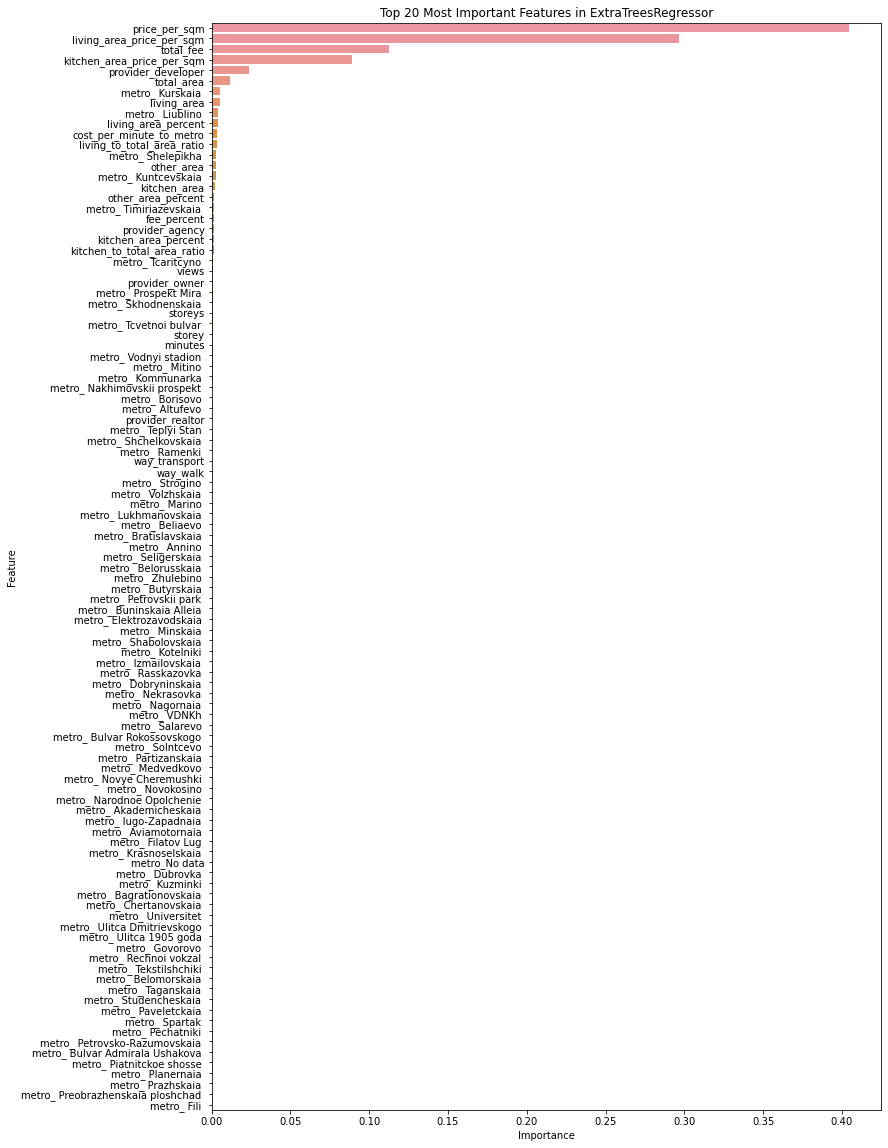

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получение важности признаков
feature_importances = et_model.feature_importances_
features = X.columns

# Создание DataFrame для удобства
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 20))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Top 20 Most Important Features in ExtraTreesRegressor')
plt.show()